In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_yds_att_salary_17-18')

In [3]:
qbs.dtypes

NAME             object
YDS/ATT         float64
YDS/ATT_rank    float64
salary            int64
dtype: object

In [4]:
qbs.head()

,NAME,YDS/ATT,YDS/ATT_rank,salary
0,Sam Bradford,8.9,1.0,18000000
1,Landry Jones,8.5,3.0,2200000
2,Deshaun Watson,8.3,4.0,3463570
3,Patrick Mahomes,8.1,5.5,4106447
4,Drew Brees,8.1,5.5,24250000


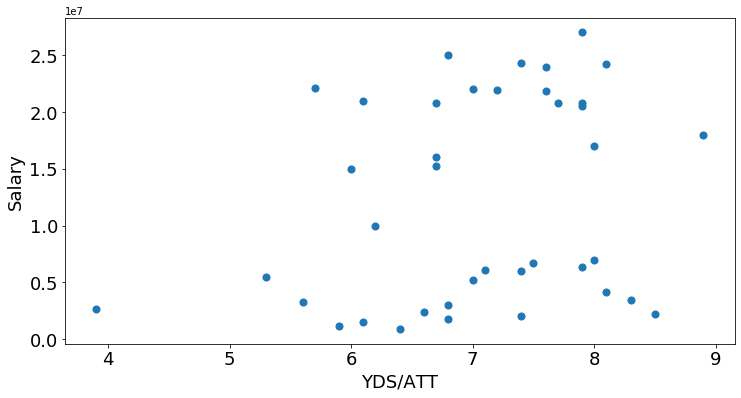

In [5]:
ax = qbs.plot(kind="scatter", x = 'YDS/ATT',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('YDS/ATT', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['YDS/ATT', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 2.50511862e-16, -1.13869028e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.50136199, -0.98002385],
       [ 0.79629459,  1.07630115],
       [ 0.84765805, -0.84838436],
       [-0.58367035,  0.82826188],
       [-2.11962802, -0.9527061 ]])

In [11]:
km.predict(X)

array([1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 3,
       3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 4, 4, 4], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,YDS/ATT,YDS/ATT_rank,salary,clusters
0,Sam Bradford,8.9,1.0,18000000,1
1,Landry Jones,8.5,3.0,2200000,2
2,Deshaun Watson,8.3,4.0,3463570,2
3,Patrick Mahomes,8.1,5.5,4106447,2
4,Drew Brees,8.1,5.5,24250000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[6.54444444e+00, 3.54852900e+06],
       [7.83636364e+00, 2.18505545e+07],
       [7.88750000e+00, 4.72016738e+06],
       [6.46250000e+00, 1.96429166e+07],
       [4.93333333e+00, 3.79166667e+06]])

In [14]:
qbs.groupby('clusters')[['YDS/ATT', 'salary']].mean()

,YDS/ATT,salary
clusters,,
0,6.544444,3.548529e+06
1,7.836364,2.185055e+07
2,7.887500,4.720167e+06
3,6.462500,1.964292e+07
4,4.933333,3.791667e+06


In [15]:
centroids = qbs.groupby('clusters')[['YDS/ATT', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

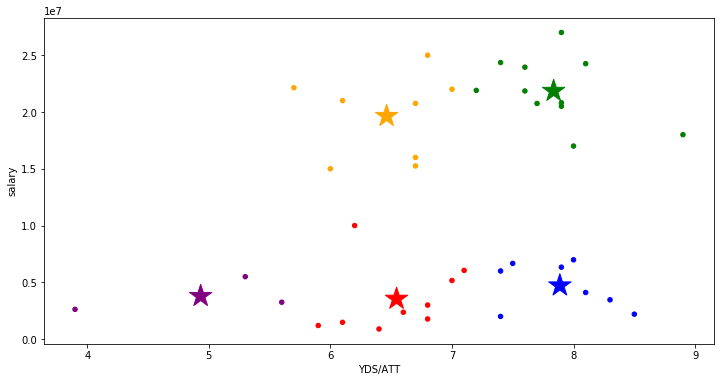

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'YDS/ATT', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'YDS/ATT', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

11.454935470574028

In [18]:
silhouette_score(X, km.labels_)

0.4364502554138042